In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


------------------------------------------------------------------------------------------------------------------------------------------------------------

##Portfolio Constraints

Investment constraints is one of the most integral part of any portfolio or an investment policy statement. Any asset class that is included in the portfolio has to be chosen only after a thorough understanding of the investment constraints.

Investment constraints are the factors that restrict or limit the investment options available to an investor. 


So the constarints of my portfolio are -

* **Time Horizon** :-
  Investing in this portfolio requires the investor to hold his invested assets for a period of atleast 2 months or when the policy change is incorporated( whichever is earlier )

* **Taxation** :-
  The investor should note that once investing in this portfolio, whatever returns or dividends are provided will automatically be taxed as per the [SEBI ACT, 1992](https://www.sebi.gov.in/sebi_data/attachdocs/1456380272563.pdf) . It should also be noted that the dividends (specifically Long Term Capital Gains(LTCG)) which are tax-free, would still be liable to the service charges levied by the portfolio T&C.

* **Legal & Regulatory** :- 
  Only the investor will be liable for any loss due to changes in Government Policies, Market Movement and Weight Adjustment of the assets in the portfolio. However, it should be noted that in case of weight adjustment the company will inform well in advance & the investor may withdraw the investments in a stipulated period of time. 

* **Liquidity** :- 
  The investor shall be aware that this portfolio consists only of stock investments, hence no liquidity of investment is enacted here. But, suppose if an emergency arises then the investor might take back the investment but on the terms of mortgage.



------------------------------------------------------------------------------------------------------------------------------------------------------------

##Portfolio Details 

**Stocks Traded** :-

1. ASIAN PAINTS - FMCG (FAST MOVING CONSUMER GOODS) SECTOR
2. HDFC BANK - BANKING SECTOR
3. HINDUSTAN UNILEVER - FMCG (FAST MOVING CONSUMER GOODS) SECTOR
4. EICHER MOTORS - AUTO SECTOR
5. CIPLA PHARMA - PHARMA SECTOR
6. RELIANCE - PRIVATE SECTOR ENTERPRISE
7. TCS - IT SECTOR COMPANY

**Stock Market** :- NSE

**Time Considered for Analysis** :- 01/01/2010 to 31/12/2019


------------------------------------------------------------------------------------------------------------------------------------------------------------

**Q1** How did you choose the stocks ?

**Answer** :- My thought process for selecting the stocks is as follows :-

1. Firstly, choose the stocks from different sector of companies( i.e. FMCG, Pharma, Bank, etc. ). The reason for this is - the concept of divesification ( as stated in MPT ) for risk minimization.

2. Once you have selected the sectors, then pick up the companies performing well in long-run.

3. Also try to analyse each stock stock individually to understand the risk-reward trade-off of each of them.

4. The third and the least important step is to check the face value of the company and the dividend given over it.

------------------------------------------------------------------------------------------------------------------------------------------------------------

Now after choosing the stocks, the most important task is assigning optimal weigths to the stocks, so that the portfolio lies in set of `Efficient Frontier` , such that for a given return the risk is minumum or for a given risk, return is maximum.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Let's initialize the data frame which would store the data for the stocks

In [ ]:
date_index = pd.date_range(start = "2010-01-01", end = "2019-12-31" , freq="D")
data = pd.DataFrame( index = date_index)

type(data)

pandas.core.frame.DataFrame

In [ ]:
#Function to read data for the different stocks

def read_data(path, df, stock_name) :
  data = pd.read_csv(path)
  data.sort_index(ascending = False, axis=0, inplace=True)
  
  #converting all columns to loewr case & removing any leading or trailing spaces
  data.columns = data.columns.str.lower()
  data.columns = data.columns.str.strip()

  #converting the index to the date
  data = data.set_index(pd.to_datetime(data['date']))

  #We need only adjusted price columns in our data frame
  df[stock_name] = data['adj close']

  return df



In [ ]:
data = read_data('/content/sample_data/ASIANPAINT.NS.csv', data, 'ap')
data = read_data('/content/sample_data/CIPLA.NS.csv', data, 'cipla')
data = read_data('/content/sample_data/EICHERMOT.NS.csv', data, 'eicher')
data = read_data('/content/sample_data/HDFCBANK.NS.csv', data, 'hdfc')
data = read_data('/content/sample_data/HINDUNILVR.NS.csv', data, 'hu')
data = read_data('/content/sample_data/RELIANCE.NS.csv', data, 'relaince')
data = read_data('/content/sample_data/TCS.NS.csv', data, 'tcs')

In [ ]:
data.head(7)

,ap,cipla,eicher,hdfc,hu,relaince,tcs
2010-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-01-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-01-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-01-04,162.925415,319.837677,57.927864,158.248413,216.147278,485.824005,302.451019
2010-01-05,163.440033,314.105194,55.994507,158.387589,215.453201,483.655701,302.531525
2010-01-06,162.948135,326.802032,55.527241,158.494308,216.678070,491.470398,295.690979
2010-01-07,161.285767,324.101532,54.751324,158.907150,216.228928,499.623901,287.462311


Now we would drop all the rows containing NaN values

In [ ]:
data.dropna(axis = 0, how = 'any', inplace=True)

Now, we would calculate the daily returns as follows:-  
## **$\frac{current \ day \ close \ price - prev \ day \ close \ price}{prev \ day \ close \ price} 
$**

For this we would use the pct_change() method.

In [ ]:
#convert daily stock prices in daily returns

returns = data.pct_change()
returns.head()

,ap,cipla,eicher,hdfc,hu,relaince,tcs
2010-01-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-01-05,0.003159,-0.017923,-0.033375,0.000879,-0.003211,-0.004463,0.000266
2010-01-06,-0.003010,0.040422,-0.008345,0.000674,0.005685,0.016158,-0.022611
2010-01-07,-0.010202,-0.008263,-0.013974,0.002605,-0.002073,0.016590,-0.027829
2010-01-08,0.016520,-0.002777,0.013467,0.001314,0.004343,-0.002622,-0.020437


In [ ]:
returns.dropna(axis = 0, how = 'any', inplace = True)

We will need the mean daily returns for the calculation of portfolio return and covariance matrix in order to calculate the standad deviation for the whole porfolio, in which the diagonals represent variance of the returns and the other entries are pairwise-covariance of returns for different stocks.

In [ ]:
mean_daily_returns = returns.mean()

In [ ]:
cov_matrix = returns.cov()

In [ ]:
cov_matrix

,ap,cipla,eicher,hdfc,hu,relaince,tcs
ap,0.000243,0.000043,0.000080,0.000062,0.000049,0.000064,0.000027
cipla,0.000043,0.000245,0.000054,0.000046,0.000037,0.000053,0.000032
eicher,0.000080,0.000054,0.000448,0.000068,0.000043,0.000078,0.000024
hdfc,0.000062,0.000046,0.000068,0.000175,0.000048,0.000086,0.000042
hu,0.000049,0.000037,0.000043,0.000048,0.000213,0.000045,0.000032
relaince,0.000064,0.000053,0.000078,0.000086,0.000045,0.000272,0.000050
tcs,0.000027,0.000032,0.000024,0.000042,0.000032,0.000050,0.000247


Now, it is not feasible to manually assign weights randomly and check for optimal values, instead a better way would be to code the weight assignments randomly and iterate over them to find the optimal values.

The above technique is named as **Monte-Carlo** Simulation and we will implement it below.

In the below code the three columns of *results* matrix represent, porfolio_returns , portfolio_standard_deviation & sharpe_ratio corresponding each weight point

In [ ]:
#set number of runs of random portfolio weights
num_portfolios = 25000

#assign the number of stocks in the portfolio
num_stocks = len(data.columns)

#set up array to hold results & the corresponding weights of the stocks over the iterations 
#which would help later to locate the optimal weights
results = np.zeros((3 + num_stocks ,num_portfolios))

**Sharpe Ratio** :-

##**$\frac{return \ on \ risky \ asset - return \ on \ risk \ free \ asset}  {risk \ standard \ deviation \ of \ portfolio}$**

But in the below simulation the return on risk-free asset is assumed to be 0

In [ ]:
# iterating over the num_portfolos and assigning the results in results array 

for i in range(num_portfolios):

    #select random weights for portfolio holdings
    weights = np.random.random(num_stocks)

    #rebalance weights to sum to 1, to ensure that all the money is used
    weights /= np.sum(weights)
    
    #calculate portfolio return and volatility
    #here 252 is taken as the number of avg working days in a year
    portfolio_return = np.sum(mean_daily_returns * weights) * 252
    portfolio_std_dev = np.sqrt(np.dot(weights.T,np.dot(cov_matrix, weights))) * np.sqrt(252)
    
    #store results in results array
    results[0,i] = portfolio_return
    results[1,i] = portfolio_std_dev
    #store Sharpe Ratio (return / volatility) - risk free rate element excluded for simplicity
    results[2,i] = results[0,i] / results[1,i]

    #storing the corrsponding weights in the results matrix
    for j in range(len(weights)):
        results[j+3,i] = weights[j]

In [ ]:
results

array([[0.21281022, 0.21849736, 0.28142441, ..., 0.2138392 , 0.24025836,
        0.23657375],
       [0.15394941, 0.14865684, 0.1542876 , ..., 0.15145576, 0.14654735,
        0.1476177 ],
       [1.38233868, 1.46981035, 1.82402479, ..., 1.41189216, 1.63945888,
        1.60261098],
       ...,
       [0.01309445, 0.17848789, 0.17402237, ..., 0.06593067, 0.23930995,
        0.11470817],
       [0.14062792, 0.23448388, 0.07337741, ..., 0.21252005, 0.19617415,
        0.14226991],
       [0.06634991, 0.05637477, 0.26807709, ..., 0.17494152, 0.2185653 ,
        0.11108764]])

Now we would plot the data to visualise the risk-return tradeoff related with the assignement of weights to different stocks in the portfolio

In [ ]:
#convert results array to Pandas DataFrame
results_frame = pd.DataFrame(results.T, columns=['ret', 'stdev', 'sharpe' ] + list(data.columns))
results_frame.head()

,ret,stdev,sharpe,ap,cipla,eicher,hdfc,hu,relaince,tcs
0,0.212810,0.153949,1.382339,0.092269,0.271353,0.150842,0.265464,0.013094,0.140628,0.066350
1,0.218497,0.148657,1.469810,0.063766,0.159736,0.121326,0.185826,0.178488,0.234484,0.056375
2,0.281424,0.154288,1.824025,0.112096,0.001676,0.236214,0.134536,0.174022,0.073377,0.268077
3,0.203234,0.152245,1.334914,0.009355,0.241796,0.138058,0.138210,0.104995,0.253581,0.114006
4,0.225891,0.139074,1.624255,0.116963,0.202929,0.093201,0.167562,0.212081,0.022566,0.184696


In the below code the colormap in the plot characterises Sharpe Ratio

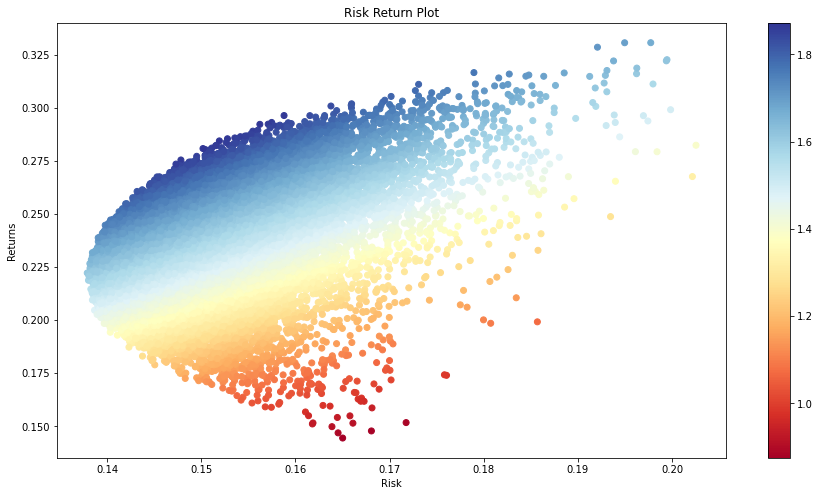

In [ ]:
#create scatter plot coloured by Sharpe Ratio
plt.figure(figsize = (15,8))
plt.scatter(results_frame.stdev, results_frame.ret, c=results_frame.sharpe, cmap='RdYlBu')
plt.title('Risk Return Plot')
plt.xlabel('Risk')
plt.ylabel('Returns')
plt.colorbar()

Now from the abobe plot we can conclude that the blue boundary line corresponds to the **`Efficient Frontier`**

Now, we would locate the optimal weights for :- 

1. The portfolio which has highest return( highest sharpe ratio)
2. The portfolio with minimum risk( minimum standard deviation )

In [ ]:
#portfolio with highest Sharpe Ratio
max_return_port = results_frame.iloc[results_frame['sharpe'].idxmax()]

#locate positon of portfolio with minimum standard deviation
min_risk_port = results_frame.iloc[results_frame['stdev'].idxmin()]

In [ ]:
max_return_port

ret         0.284389
stdev       0.151924
sharpe      1.871912
ap          0.216430
cipla       0.011059
eicher      0.207190
hdfc        0.140573
hu          0.196096
relaince    0.008899
tcs         0.219753
Name: 16479, dtype: float64

In [ ]:
min_risk_port

ret         0.222194
stdev       0.137893
sharpe      1.611355
ap          0.155833
cipla       0.174641
eicher      0.057423
hdfc        0.181172
hu          0.187825
relaince    0.052781
tcs         0.190324
Name: 753, dtype: float64

The following code locates the **max_return_port** & **min_risk_port** in the above plot 

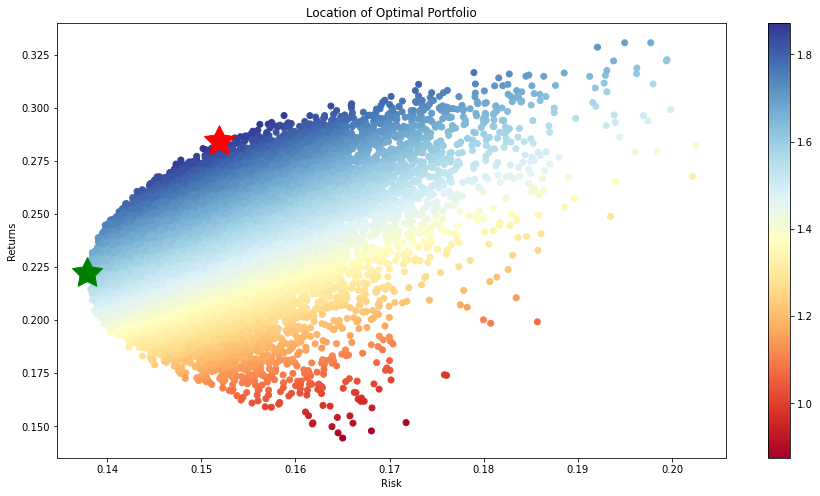

In [ ]:
#create scatter plot coloured by Sharpe Ratio
plt.figure(figsize = (15, 8))
plt.scatter(results_frame.stdev,results_frame.ret,c=results_frame.sharpe,cmap='RdYlBu')
plt.title('Location of Optimal Portfolio')
plt.xlabel('Risk')
plt.ylabel('Returns')
plt.colorbar()
#plot red star to highlight position of portfolio with highest Sharpe Ratio(i.e. max return)
plt.scatter(max_return_port[1],max_return_port[0],marker=(5,1,0),color='r',s=1000)
#plot green star to highlight position of minimum variance portfolio(i.e. minimum risk)
plt.scatter(min_risk_port[1],min_risk_port[0],marker=(5,1,0),color='g',s=1000)

----------------------------------------------------------------------------------------

**Q2** What is the impact of increasing the number of stocks in the portfolio?

**Answer** :- As the Capinski book gives the formula for standard deviation of portfolio returns as

###$\sigma_V^2 = Var(\epsilon_V) \ + \ \beta_V^2 \sigma_M^2 $

The two parts of the equation, i.e.  $Var(\epsilon_V)$ signifies the unsystematic or diversifiable risk whereas $\beta_V^2 \sigma_M^2$ signifies systematic or undiversifiable risk. Now keeping that in mind, increasing the number of stocks in the portfolio assures of diversification due to which the diversifiable risk is reduced and as a result $\sigma_V^2$(i.e. portfolio risk) is also reduced. One more thing to note is that systematic risk is inherent to the whole market and is not in our control, it is affected by Govt. Policies, Market Recession, etc.

But even having a very large number of stocks would hurt the portfolio performance, say we have 100 stocks, in thar=t case even a good performing stock would contribute a little to the portfolio. Also, the rule regarding diversification is that it’s marginal benefit reduces as the number of stocks increases a certain value.

------------------------------------------------------------------------------------------

**Q3** Why are calculating the weights by optimization not giving equal weightage to every stock?

**Answer** :- The very simple answer to this question is that, each stock has their respective returns as well as risk , so in order to maximise the return or minimize the risk of portfolio, we need a combination of optimal weights which may or may not be equal, subject to the constraint that $\Sigma w_i = 1$

A simple example is :-
Suppose we want to maximise the below function
a + 3b + 5c subject to the constraint a + b + c = 1, then for this we need not have a = b = c.


-----------------------------------------------------------------------------------------

**Q4** Which optimization techniques are used by Mutual Funds currently?

**Answer** :- Optimization Techniques are basically risk - management techniques for any portfolio. Some of the optimization techniques used by mutual funds currently are -

* mean-semivariance portfolio optimization model 
* fuzzy optimization model
* Stochastic Programming
* CAPM

Note :- This answer might be inaccurate, I would request you to please provide the right answer or reference to the right answer after the assignment is submitted.


-------------------------------------------------------------------------------------------------------------------------------